# Modelling House Prices For Surprise Housing Company

## GITHUB LINK: 


Problem Statement: A US-based housing company named Surprise Housing has decided to enter the Australian market. The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

This notebook aims to provide answers to the above queries. The solution is segregated as follows

- Data Exploration and Understanding
- Data Cleaning
    - Handling NULL Values
    - Handling Outliers
- Exploratory Data Analysis
- ML Model Building and Evaluation.
- Observation and Inference.

In [856]:
# Import Necessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# setting these so that we can observe the data in the entriety 
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 500)

# let's also ignore the warnings for better visibility
import warnings
warnings.filterwarnings('ignore')

# Data Exploration & Understanding 

In [857]:
# read the data set
housing_df = pd.read_csv('train.csv')
housing_df.head(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000


In [858]:
# Let's check the dimensions
housing_df.shape

(1460, 81)

In [859]:
# number of rows doesn't seem to be humongous

# Let's describe the data
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [860]:
# Let's Check the Columns and it's data types
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We have only int, float and object data, thus broadly we have only numeric and object data type 

# DATA CLEANING


## Handling Null Values

In [861]:
# let's check the null value content for each attribute.

# calculating the percentage would give us a clear picture
null_percentage = round(100*(housing_df.isnull().sum()/len(housing_df.index)), 1)

# let's sort this is desceding order
null_percentage.sort_values(ascending=False)

PoolQC           99.5
MiscFeature      96.3
Alley            93.8
Fence            80.8
FireplaceQu      47.3
LotFrontage      17.7
GarageYrBlt       5.5
GarageCond        5.5
GarageType        5.5
GarageFinish      5.5
GarageQual        5.5
BsmtFinType2      2.6
BsmtExposure      2.6
BsmtQual          2.5
BsmtCond          2.5
BsmtFinType1      2.5
MasVnrArea        0.5
MasVnrType        0.5
Electrical        0.1
Id                0.0
Functional        0.0
Fireplaces        0.0
KitchenQual       0.0
KitchenAbvGr      0.0
BedroomAbvGr      0.0
HalfBath          0.0
FullBath          0.0
BsmtHalfBath      0.0
TotRmsAbvGrd      0.0
GarageCars        0.0
GrLivArea         0.0
GarageArea        0.0
PavedDrive        0.0
WoodDeckSF        0.0
OpenPorchSF       0.0
EnclosedPorch     0.0
3SsnPorch         0.0
ScreenPorch       0.0
PoolArea          0.0
MiscVal           0.0
MoSold            0.0
YrSold            0.0
SaleType          0.0
SaleCondition     0.0
BsmtFullBath      0.0
HeatingQC 

### Observations:

#### properties containing more than 80% null values need be simply discared as they do not provide much insight.

#### Also, according to Data definition Null Values for Categorical columns simply means their absence. This may inturn affect the price so let's take that into account and imputate the null values with "NA"

In [862]:
# Properties having more than 80% null values can definetly be dropped as they provide no insight
# we will drop the 'PoolQC','MiscFeature','Alley' & 'Fence'
housing_df = housing_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'],axis=1)

# let's drop the id column as well as that is unnecessary information 
housing_df = housing_df.drop(['Id'],axis=1)

housing_df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [863]:
# Let's fill the columns defined in the data dictionary where nulls have meaning

columns_with_null_values = ["MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for index in columns_with_null_values:
    housing_df[index].fillna("NA", inplace=True)

In [864]:
# let's check if we have handled all null values
null_percentage = round(100*(housing_df.isnull().sum()/len(housing_df.index)), 1)
# let's sort this is desceding order
null_percentage.sort_values(ascending=False)

LotFrontage      17.7
GarageYrBlt       5.5
MasVnrArea        0.5
Electrical        0.1
BedroomAbvGr      0.0
FireplaceQu       0.0
Fireplaces        0.0
Functional        0.0
TotRmsAbvGrd      0.0
KitchenQual       0.0
KitchenAbvGr      0.0
HalfBath          0.0
FullBath          0.0
BsmtHalfBath      0.0
BsmtFullBath      0.0
GrLivArea         0.0
LowQualFinSF      0.0
2ndFlrSF          0.0
1stFlrSF          0.0
GarageType        0.0
MSSubClass        0.0
CentralAir        0.0
GarageCars        0.0
SaleCondition     0.0
SaleType          0.0
YrSold            0.0
MoSold            0.0
MiscVal           0.0
PoolArea          0.0
ScreenPorch       0.0
3SsnPorch         0.0
EnclosedPorch     0.0
OpenPorchSF       0.0
WoodDeckSF        0.0
PavedDrive        0.0
GarageCond        0.0
GarageQual        0.0
GarageArea        0.0
GarageFinish      0.0
HeatingQC         0.0
MSZoning          0.0
Heating           0.0
YearBuilt         0.0
OverallCond       0.0
OverallQual       0.0
HouseStyle

In [865]:
'''
We have nulls in the following columns
LotFrontage      17.7 - Numeric
GarageYrBlt       5.5 - Numeric 
MasVnrArea        0.5 - Numeric
Electrical        0.1 - Numeric
'''

# Observe LotFrontage

housing_df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [866]:
housing_df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [867]:
housing_df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [868]:
housing_df['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [869]:
housing_df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [870]:
# electrical has a very small amount of unique values thus let's simply imputate it with mode 
housing_df['Electrical'] = housing_df["Electrical"].fillna(housing_df["Electrical"].mode()[0])

# As per the data dictionary "LotFrontage" is Linear feet of street connected to property.  
# It's distribution seems to be correct so using median to fill the missing values
housing_df['LotFrontage'] = housing_df["LotFrontage"].fillna(housing_df["LotFrontage"].median())

# As per the data dictionary "GarageYrBlt" is the Year garage was built  
# It's distribution seems to be correct so using median to fill the missing values
housing_df['GarageYrBlt'] = housing_df["GarageYrBlt"].fillna(housing_df["GarageYrBlt"].median())

# As per the data dictionary "MasVnrArea" is the Masonry veneer area in square feet
# # It's distribution seems to be skewed so using mode to fill the missing values
housing_df['MasVnrArea'] = housing_df["MasVnrArea"].fillna(housing_df["MasVnrArea"].mode()[0])

In [871]:
# checking for the presence of any more null values
housing_df.isnull().values.any()

False

### Handling Outliers

In [872]:
# Let's first Segregate Numerical & Categorical Columns

# Numerical columns
numeric = housing_df.select_dtypes(exclude='object').columns

# Categorical columns
categorical = housing_df.select_dtypes(include='object').columns

print("Numerical Columns", numeric)
print("--------------------------------")
print("Categoricl Columns", categorical)

Numerical Columns Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')
--------------------------------
Categoricl Columns Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAi

In [873]:
# Checking for outliers
housing_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,830.

<AxesSubplot:xlabel='SalePrice'>

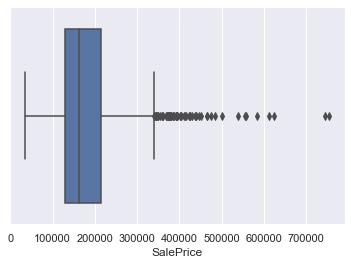

In [874]:
# Plotting graphs for few numerical columns to check the distribution for outliers

sns.boxplot(housing_df['SalePrice'])

<AxesSubplot:xlabel='GrLivArea'>

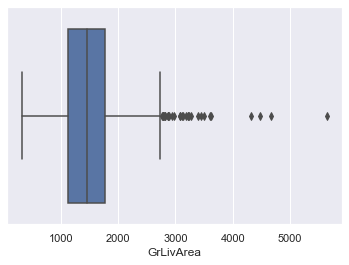

In [875]:
sns.boxplot(housing_df['GrLivArea'])

<AxesSubplot:xlabel='OverallQual'>

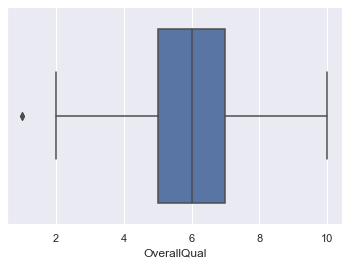

In [876]:
sns.boxplot(housing_df['OverallQual']) 

In [877]:
# let's remove the major outliers from all of the numerical columns

# Listing down all the numerical columns from above
numerical_cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'] 

quantile_1 = housing_df[numerical_cols].quantile(0.05)
quantile_3 = housing_df[numerical_cols].quantile(0.95)
inter_quantile_range = quantile_3 - quantile_1

housing_df = housing_df[~((housing_df[numerical_cols] < (quantile_1 - 1.5 * inter_quantile_range)) |(housing_df[numerical_cols] > (quantile_3 + 1.5 * inter_quantile_range))).any(axis=1)]

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

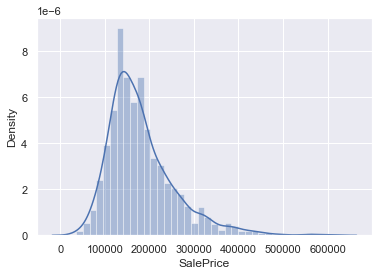

In [878]:
# we have also observed that sale price has big values. Let's check the distrubution as it is the most important factor
sns.distplot(housing_df['SalePrice'])

In [879]:
# The distribution seems to be skewed and needs to be fixed.
# We can utilise log transformation to obtain a centralized data.
housing_df['SalePrice']=np.log1p(housing_df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

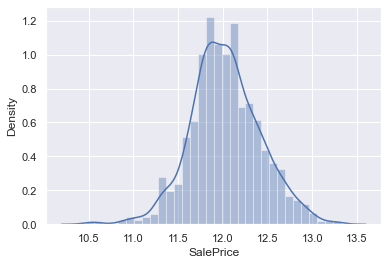

In [880]:
sns.distplot(housing_df['SalePrice'])

# Exploratory Data Analysis 

- Understanding the impact of various variables on SalePrice

In [881]:
# print the correlation matrix 
cor_mat = housing_df.corr()
cor_mat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.425187,-0.369099,0.090690,-0.072448,0.122090,0.084129,0.054778,-0.051959,-0.059338,-0.159733,-0.251979,-0.294396,0.311003,NaN,0.050132,0.026717,-0.006741,0.101069,0.227143,-0.118545,NaN,-0.038974,-0.004254,0.120312,0.001658,-0.070819,0.015978,0.012697,-0.038133,-0.039157,-0.021604,0.007424,-0.039349,-0.017910,-0.018475,-0.028952
LotFrontage,-0.425187,1.000000,0.522820,0.230567,-0.060769,0.146645,0.081453,0.166417,0.132043,0.032642,0.150062,0.318227,0.355994,0.037037,NaN,0.305102,0.055338,-0.014919,0.172703,0.049849,0.263154,NaN,0.309855,0.222612,0.084835,0.306165,0.331507,0.086312,0.135821,-0.007528,0.077504,0.052996,0.011164,0.003313,0.010662,0.007208,0.367271
LotArea,-0.369099,0.522820,1.000000,0.162689,-0.029780,0.054619,0.021362,0.135008,0.183677,0.054700,0.075983,0.299689,0.382030,0.089327,NaN,0.371310,0.089631,0.045155,0.164715,0.080633,0.281025,NaN,0.348038,0.293615,0.006837,0.287988,0.323688,0.171251,0.159597,-0.011207,0.075708,0.093427,0.045301,0.027992,-0.009880,-0.022983,0.371966
OverallQual,0.090690,0.230567,0.162689,1.000000,-0.137345,0.599228,0.550117,0.415273,0.201327,-0.108322,0.344380,0.558339,0.503978,0.288731,NaN,0.641122,0.097250,-0.060343,0.618797,0.257954,0.143843,NaN,0.519535,0.380875,0.531680,0.631896,0.571237,0.227200,0.319979,-0.120626,0.031976,0.038780,-0.004869,-0.019436,0.084229,-0.004752,0.828107
OverallCond,-0.072448,-0.060769,-0.029780,-0.137345,1.000000,-0.409069,0.041759,-0.137891,-0.039483,0.045371,-0.148921,-0.190837,-0.140903,0.007927,NaN,-0.100764,-0.044657,0.136933,-0.216599,-0.071536,0.018274,NaN,-0.060010,-0.051029,-0.338994,-0.211363,-0.176809,-0.031163,-0.064908,0.090560,0.021084,0.042613,0.033812,0.091110,0.002264,0.044080,-0.077724
YearBuilt,0.122090,0.146645,0.054619,0.599228,-0.409069,1.000000,0.615544,0.310607,0.238567,-0.079815,0.181871,0.429192,0.316285,0.063589,NaN,0.298233,0.179082,-0.047904,0.565665,0.232649,-0.019124,NaN,0.205317,0.145105,0.811446,0.570340,0.509288,0.229533,0.256483,-0.390298,0.032878,-0.050073,-0.002104,-0.036777,0.026814,-0.004657,0.617934
YearRemodAdd,0.084129,0.081453,0.021362,0.550117,0.041759,0.615544,1.000000,0.177172,0.101417,-0.109414,0.215223,0.308445,0.267731,0.149896,NaN,0.337498,0.108220,-0.022534,0.496577,0.168285,-0.010541,NaN,0.263796,0.093186,0.632908,0.454468,0.396036,0.191081,0.259675,-0.212482,0.042801,-0.050944,-0.012810,0.007582,0.023970,0.045584,0.569256
MasVnrArea,0.054778,0.166417,0.135008,0.415273,-0.137891,0.310607,0.177172,1.000000,0.226364,-0.066277,0.123882,0.356874,0.343273,0.146288,NaN,0.392089,0.089578,-0.000441,0.277077,0.196238,0.099981,NaN,0.303113,0.254996,0.252768,0.375337,0.379219,0.156644,0.135263,-0.102353,0.023574,0.055842,-0.019357,-0.025012,-0.005099,0.007738,0.437962
BsmtFinSF1,-0.051959,0.132043,0.183677,0.201327,-0.039483,0.238567,0.101417,0.226364,1.000000,-0.056726,-0.546126,0.453605,0.399625,-0.195011,NaN,0.133047,0.657869,0.057304,0.060581,-0.041702,-0.113254,NaN,0.026807,0.222328,0.146365,0.221884,0.273979,0.171940,0.093932,-0.112470,0.033674,0.071759,-0.007890,0.004531,-0.006498,0.035050,0.369004
BsmtFinSF2,-0.059338,0.032642,0.054700,-0.108322,0.045371,-0.079815,-0.109414,-0.066277,-0.056726,1.000000,-0.198654,0.062607,0.067891,-0.109752,NaN,-0.045230,0.123028,0.105036,-0.089824,-0.056591,0.005006,NaN,-0.044041,0.006679,-0.107400,-0.065313,-0.035958,0.052733,-0.019039,0.059293,-0.030185,0.052482,0.029712,-0.012772,0.003409,0.043271,-0.058417


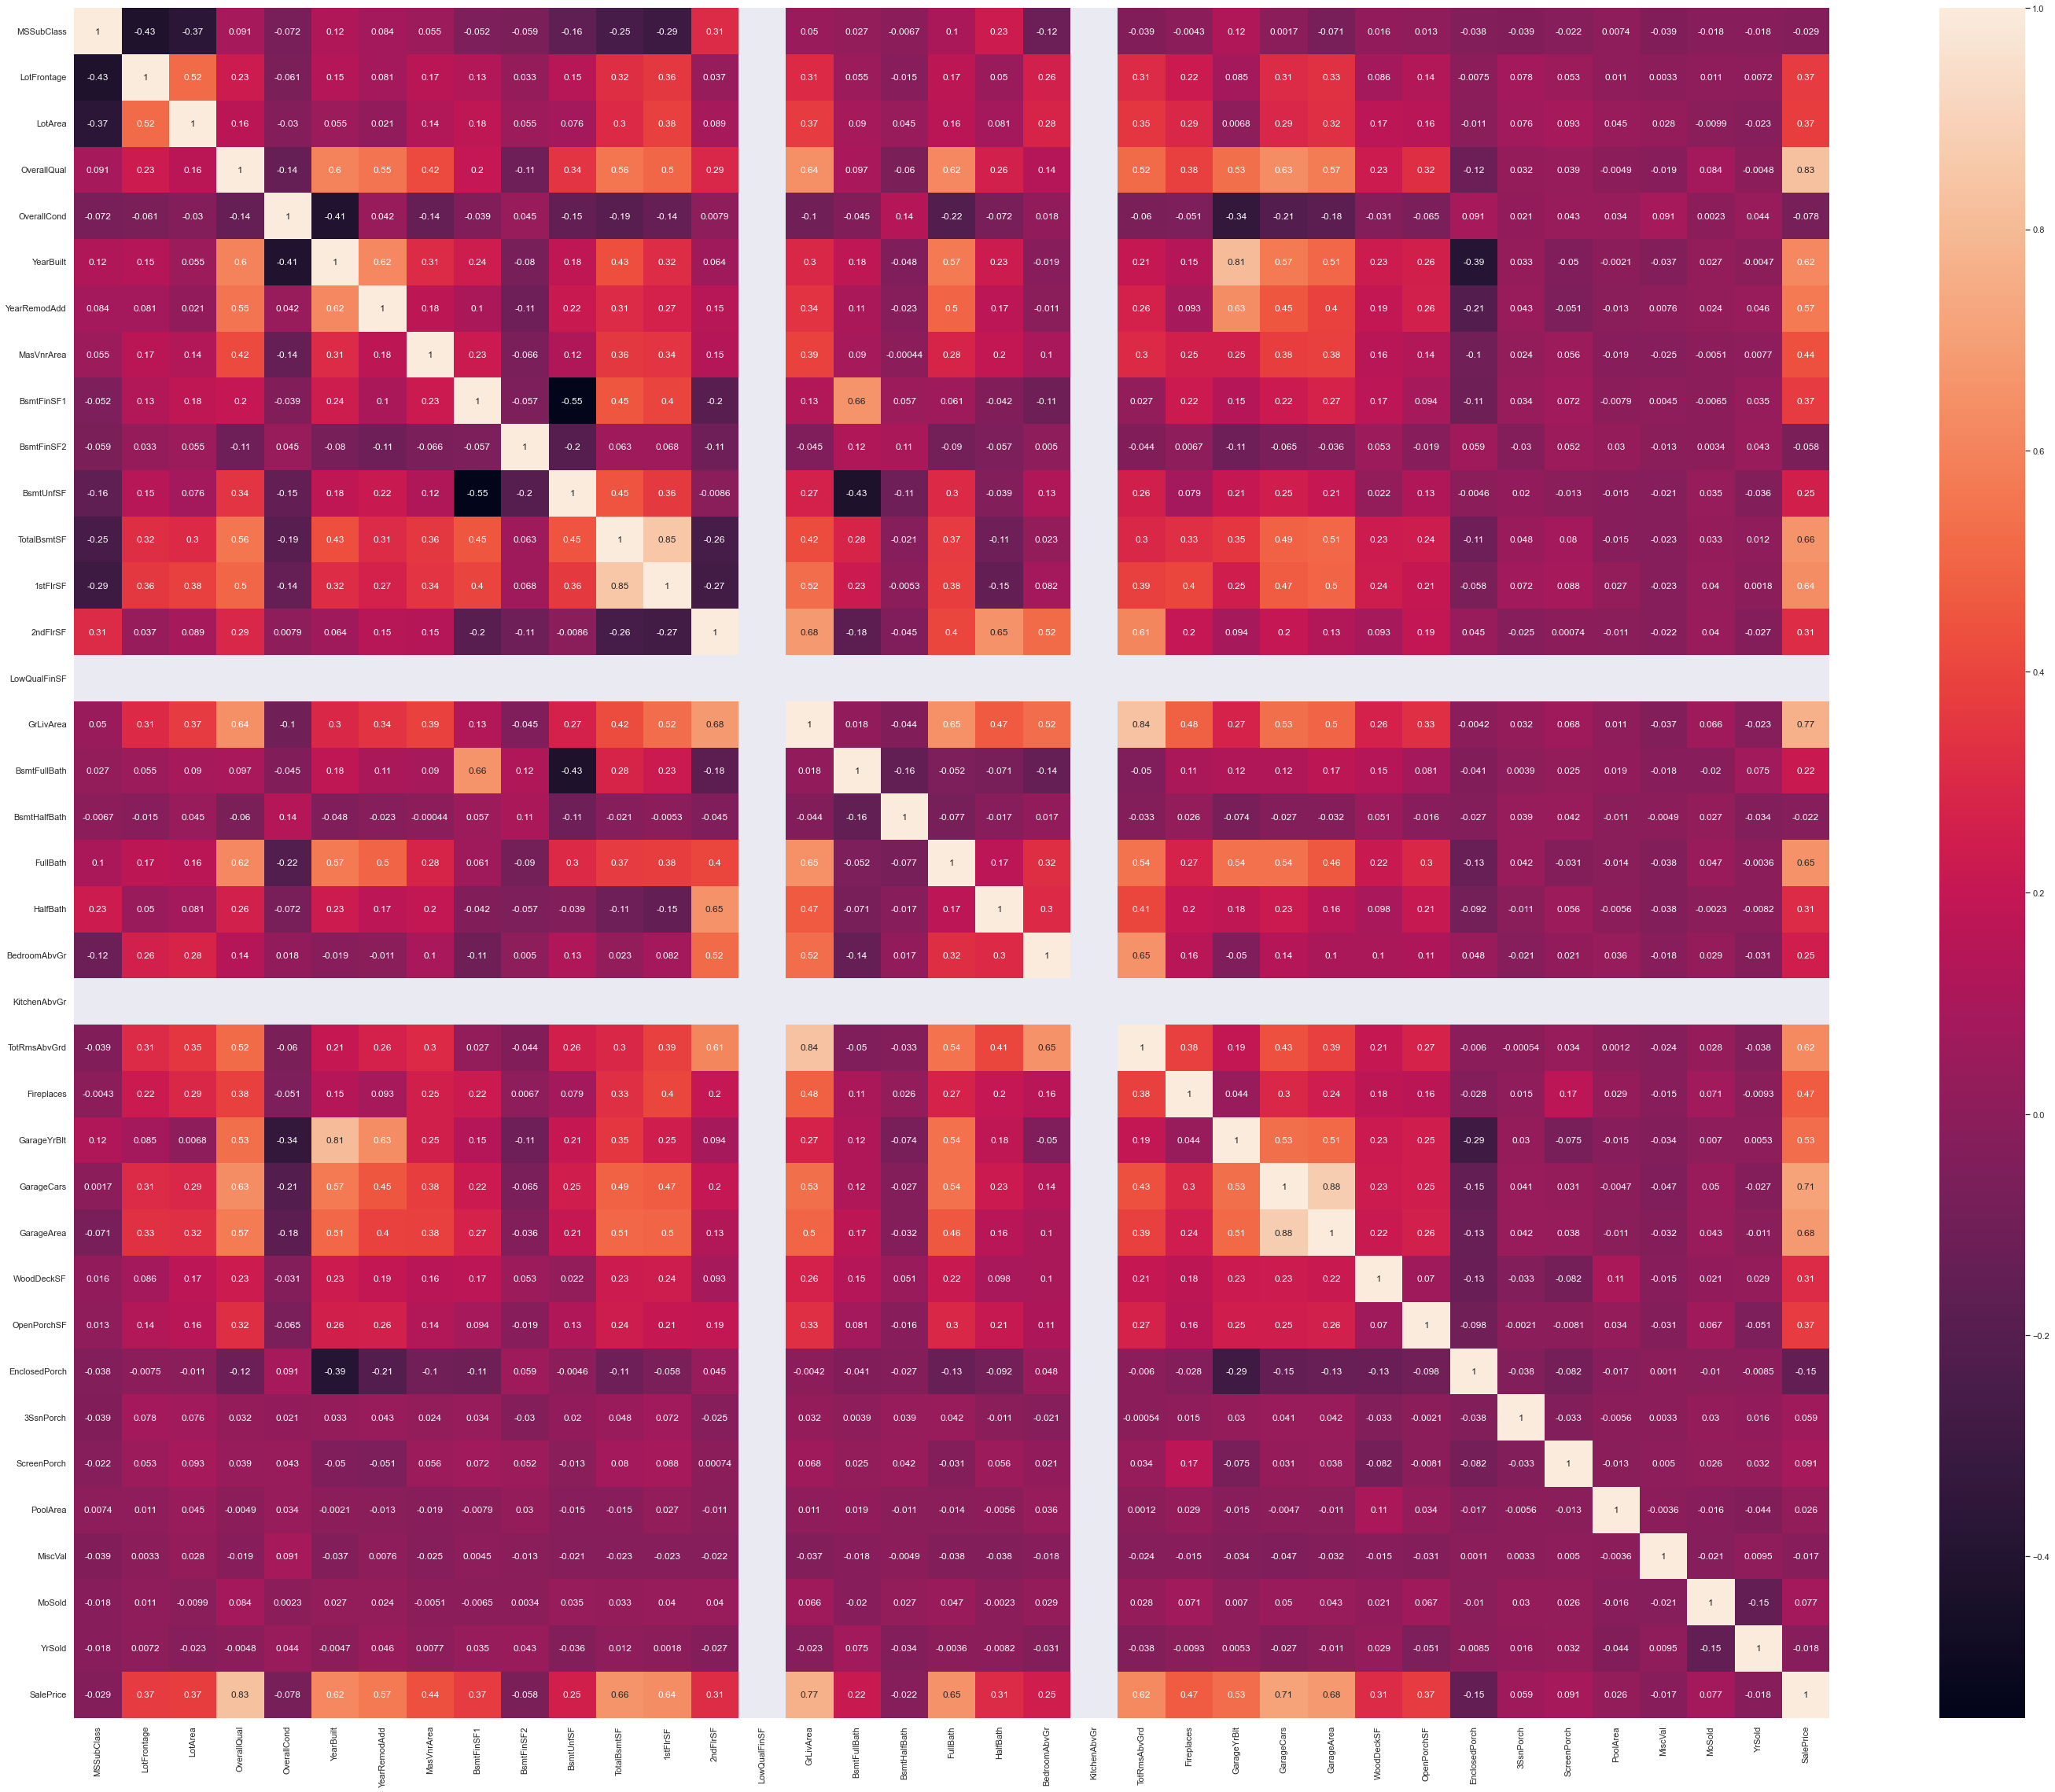

In [882]:
# plotting the heatmap to understand the correlations

# figure size
plt.figure(figsize=(50, 40))

# heatmap
sns.heatmap(cor_mat, annot=True)
plt.show()

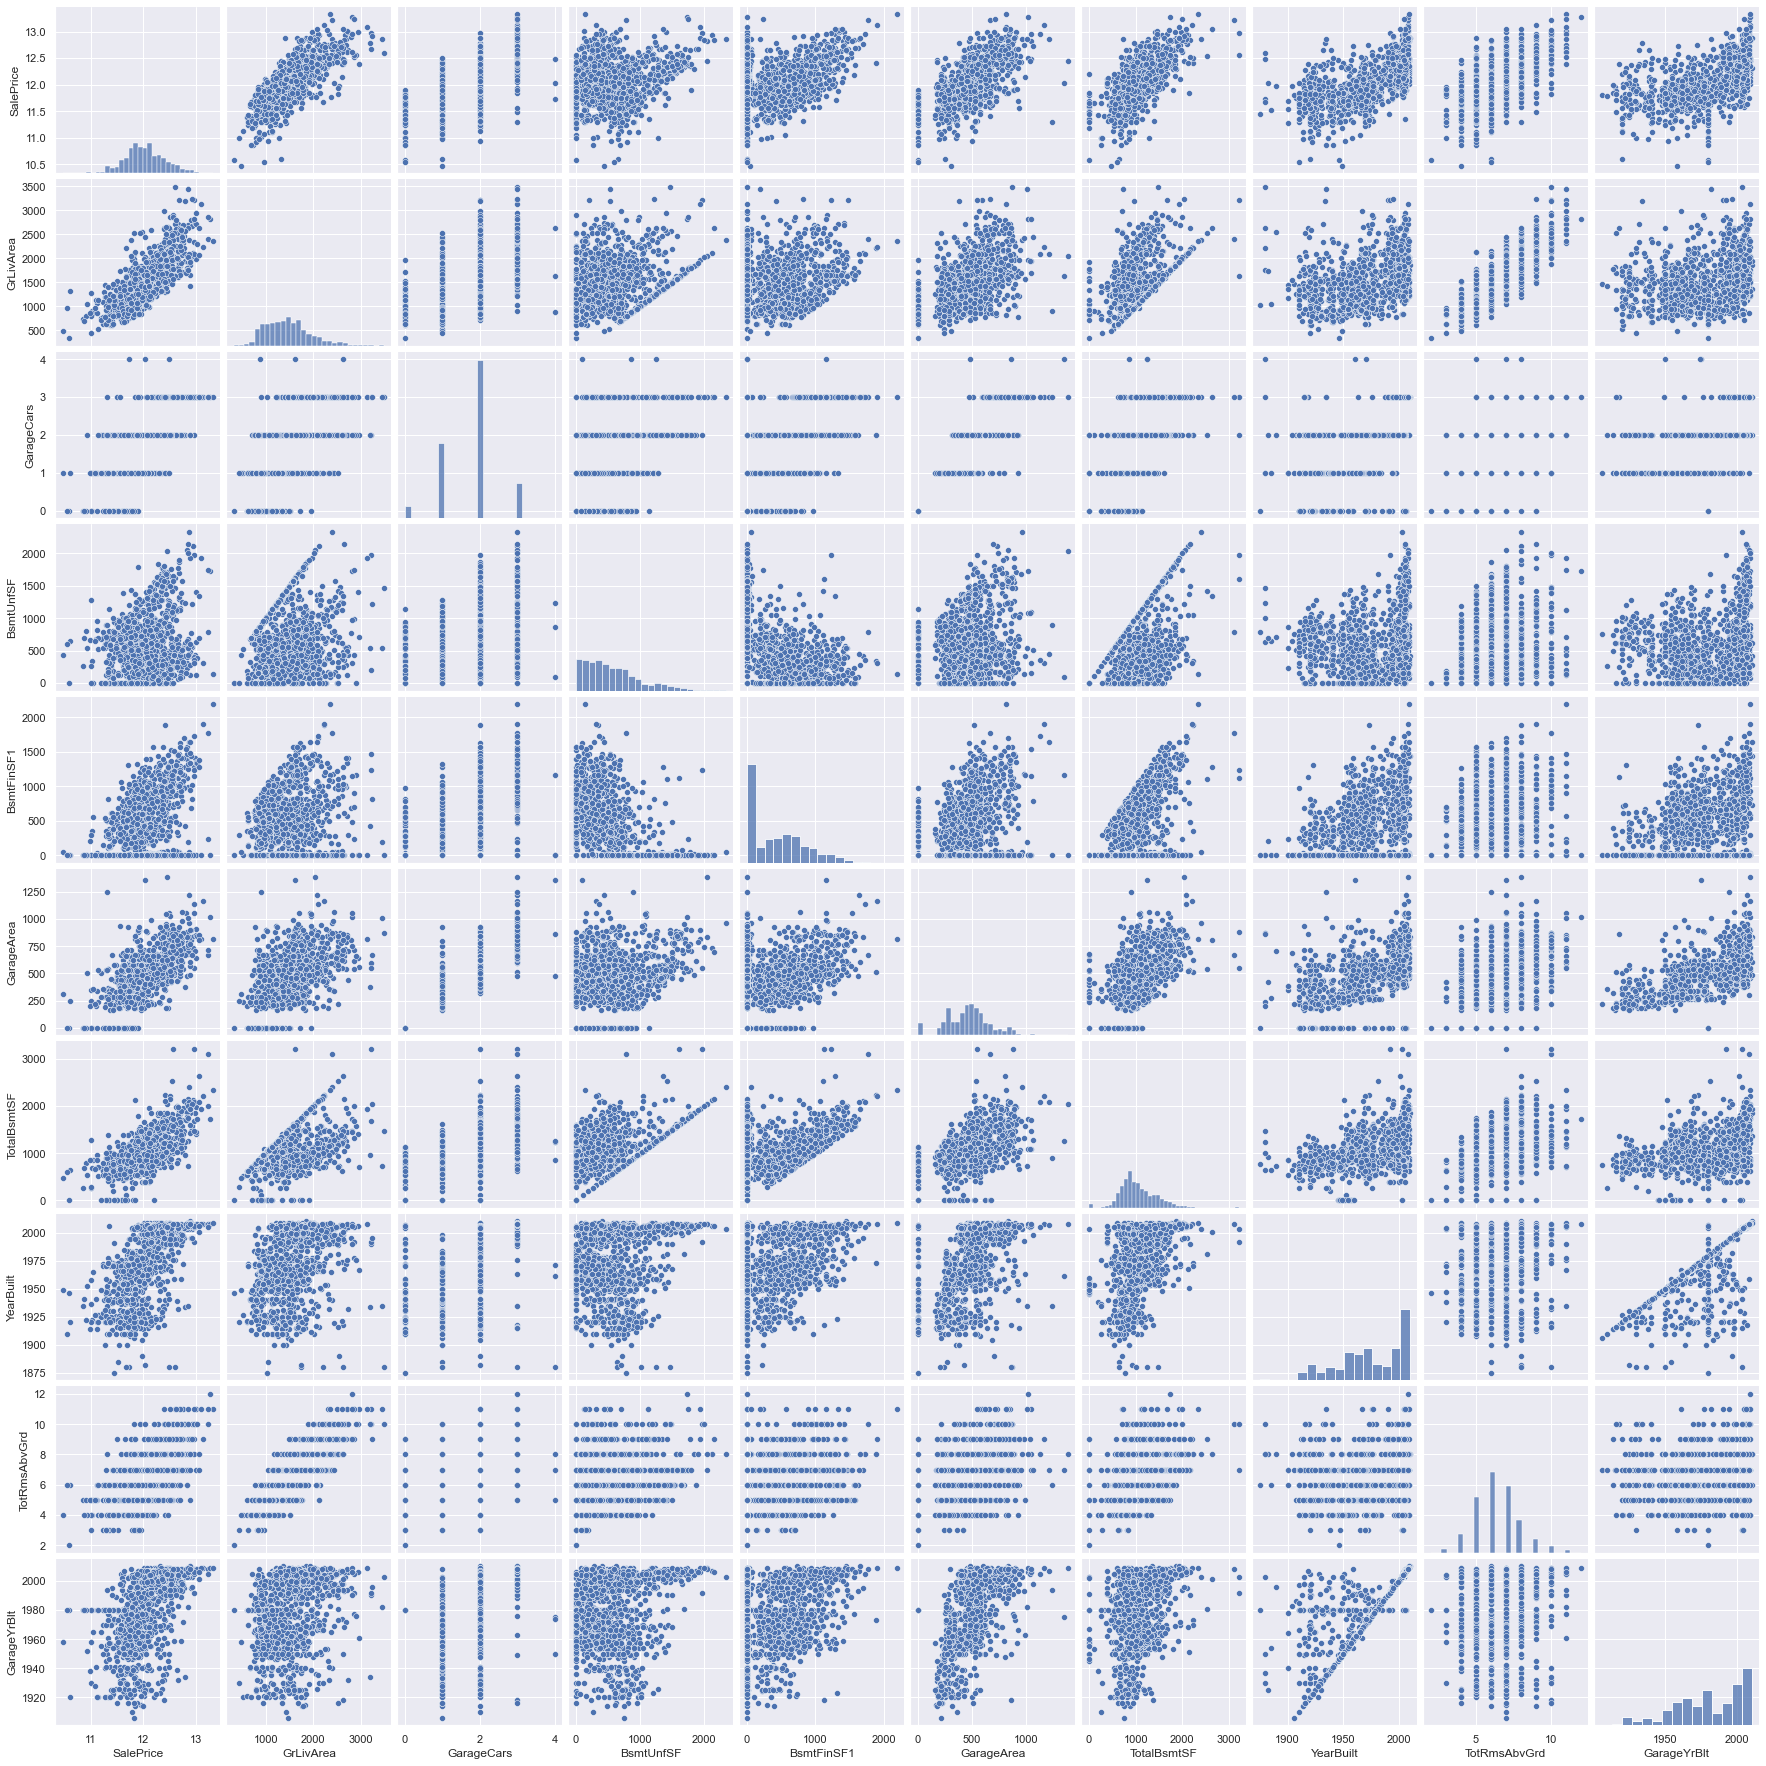

In [883]:
# based on the above correlations let's explore the impact of select few variables that seem to be correlated with 
# sales price

# using a pair plot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(housing_df[cols], size = 2.5)
plt.show()

In [884]:
# dropping these as they are not much contributing in the sales price

housing_df = housing_df.drop(['GarageCars'], axis = 1)
housing_df = housing_df.drop(['BsmtUnfSF'], axis = 1)
housing_df = housing_df.drop(['TotRmsAbvGrd'], axis = 1)
housing_df = housing_df.drop(['GarageYrBlt'], axis = 1)    

housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NA,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429220


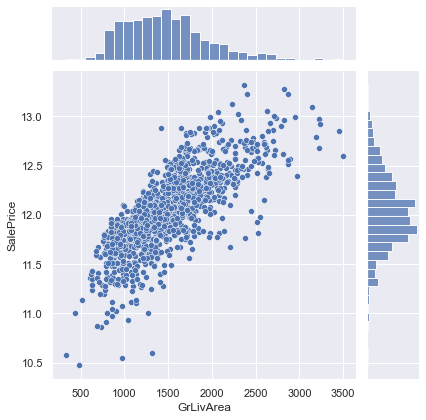

In [885]:
# analysing important variables based on above heatmap

sns.jointplot(x='GrLivArea', y='SalePrice', data=housing_df)
plt.show()

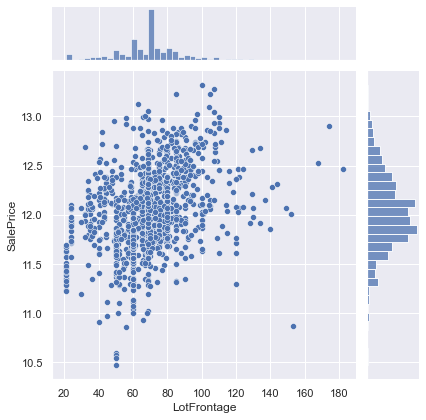

In [886]:
sns.jointplot(x='LotFrontage', y='SalePrice', data=housing_df)
plt.show()

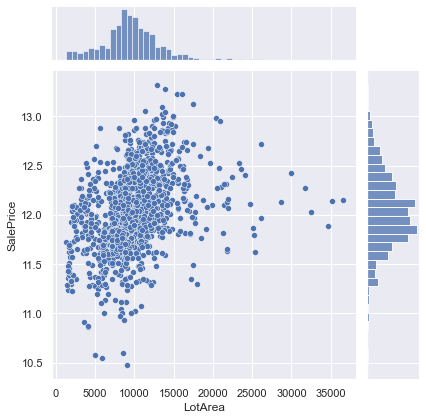

In [887]:
sns.jointplot(x='LotArea', y='SalePrice', data=housing_df)
plt.show()

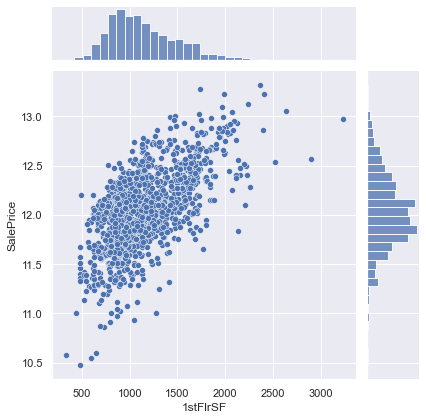

In [888]:
sns.jointplot(x='1stFlrSF', y='SalePrice', data=housing_df)
plt.show()

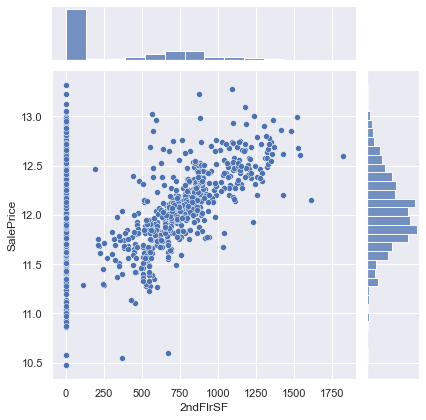

In [889]:
sns.jointplot(x='2ndFlrSF', y='SalePrice', data=housing_df)
plt.show()

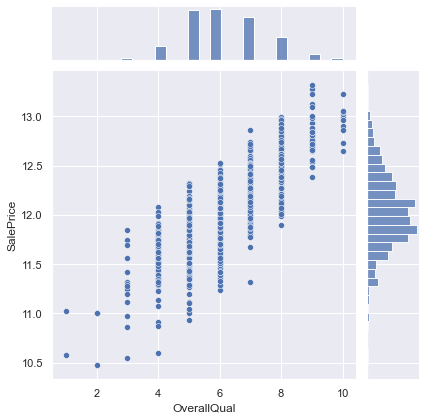

In [890]:
sns.jointplot(x='OverallQual', y='SalePrice', data=housing_df)
plt.show()

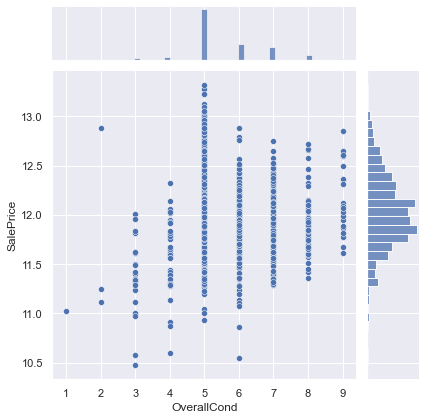

In [891]:
sns.jointplot(x='OverallCond', y='SalePrice', data=housing_df)
plt.show()

### Deriving New Columns
- Create a new column PropertyAge

In [892]:
# PropAge -  Property Age from yearsold - yearbuilt
housing_df['PropertyAge'] = (housing_df['YrSold'] - housing_df['YearBuilt'])
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NA,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109016,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317171,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429220,8


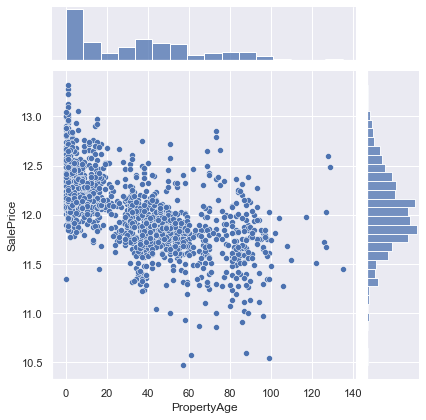

In [893]:
sns.jointplot(x='PropertyAge', y='SalePrice', data=housing_df)
plt.show()

In [894]:
# Due to the new columns these columns are no longer required
housing_df = housing_df.drop(['MoSold'], axis = 1)
housing_df = housing_df.drop(['YrSold'], axis = 1)
housing_df = housing_df.drop(['YearBuilt'], axis = 1)
housing_df = housing_df.drop(['YearRemodAdd'], axis = 1)
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NA,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,12.109016,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,12.317171,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,12.429220,8


#### Analysing Variance

In [895]:
# let's observe if the variables have enough variance to be considered in the final data set
print('Street---', housing_df.Street.value_counts())
print('Utilities---', housing_df.Utilities.value_counts())

# let's analyze the categorical variables that we imputated.
for col in columns_with_null_values:
    print("Values Count----")
    print(housing_df[col].value_counts())

Street--- Pave    1328
Grvl       5
Name: Street, dtype: int64
Utilities--- AllPub    1332
NoSeWa       1
Name: Utilities, dtype: int64
Values Count----
None       769
BrkFace    420
Stone      123
BrkCmn      14
NA           7
Name: MasVnrType, dtype: int64
Values Count----
Gd    588
TA    582
Ex    113
Fa     30
NA     20
Name: BsmtQual, dtype: int64
Values Count----
TA    1213
Gd      60
Fa      38
NA      20
Po       2
Name: BsmtCond, dtype: int64
Values Count----
No    881
Av    211
Gd    112
Mn    108
NA     21
Name: BsmtExposure, dtype: int64
Values Count----
GLQ    393
Unf    390
ALQ    211
BLQ    138
Rec    121
LwQ     60
NA      20
Name: BsmtFinType1, dtype: int64
Values Count----
Unf    1168
Rec      46
LwQ      42
BLQ      30
NA       21
ALQ      15
GLQ      11
Name: BsmtFinType2, dtype: int64
Values Count----
NA    613
Gd    358
TA    289
Fa     32
Ex     22
Po     19
Name: FireplaceQu, dtype: int64
Values Count----
Attchd     830
Detchd     336
BuiltIn     84
NA          

In [896]:
# Very little varaince in these so let's drop them
housing_df = housing_df.drop(['Street'], axis = 1)
housing_df = housing_df.drop(['Utilities'], axis = 1)
housing_df = housing_df.drop(['GarageCond'], axis = 1)


In [897]:
# let's check the variance in numerical columns
# <<only inlcuding the ones I will be removing to keep the workbook clean. >>
numerical_cols = ['MiscVal','RoofMatl','Condition2', 'Heating', 'Functional']
for col in numerical_cols:
    print("value counts-----")
    print(housing_df[col].value_counts())

value counts-----
0        1291
400        10
500         6
450         4
700         4
2000        3
1200        2
480         2
600         2
15500       1
800         1
350         1
1300        1
54          1
620         1
560         1
1400        1
2500        1
Name: MiscVal, dtype: int64
value counts-----
CompShg    1317
Tar&Grv       8
WdShake       5
WdShngl       2
Metal         1
Name: RoofMatl, dtype: int64
value counts-----
Norm     1326
Feedr       4
RRNn        2
PosN        1
Name: Condition2, dtype: int64
value counts-----
GasA     1309
GasW       14
Grav        7
Wall        1
OthW        1
Floor       1
Name: Heating, dtype: int64
value counts-----
Typ     1251
Min2      30
Min1      27
Maj1      11
Mod        9
Maj2       4
Sev        1
Name: Functional, dtype: int64


In [898]:
# As we can see not enough variance. Let's remove them
housing_df = housing_df.drop(numerical_cols, axis = 1)

# Model Building

In [899]:
# let's create the dummy values for categorical columns
housing_df = pd.get_dummies(housing_df, drop_first=True )
housing_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,12.247699,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,12.109016,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,12.317171,7,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,11.849405,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,12.429220,8,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [900]:
X = housing_df.drop(['SalePrice'], axis=1)
X.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,7,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,8,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
5,50,85.0,14115,5,5,0.0,732,0,796,796,566,0,1362,1,0,1,1,1,1,0,480,40,30,0,320,0,0,16,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6,20,75.0,10084,8,5,186.0,1369,0,1686,1694,0,0,1694,1,0,2,0,3,1,1,636,255,57,0,0,0,0,3,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
7,60,69.0,10382,7,6,240.0,859,32,1107,1107,983,0,2090,1,0,2,1,3,1,2,484,235,204,228,0,0,0,36,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
10,20,70.0,11200,5,5,0.0,906,0,1040,1040,0,0,1040,1,0,1,0,3,1,0,384,0,0,0,0,0,0,43,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
11,60,85.0,11924,9,5,286.0,998,0,1175,1182,1142,0,2324,1,0,3,0,4,1,2,736,147,21,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [901]:
# Putting response variable to y
y = housing_df['SalePrice']
y.head(10)

0     12.247699
1     12.109016
2     12.317171
3     11.849405
4     12.429220
5     11.870607
6     12.634606
7     12.206078
10    11.771444
11    12.751303
Name: SalePrice, dtype: float64

In [902]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [903]:
# let's observe the split
print('X_train shape info', X_train.shape)
print('')
print('X_test shape info', X_test.shape)
print('')
print('y_train shape info', y_train.shape)
print('')
print('y_test shape info', y_test.shape)

X_train shape info (933, 206)

X_test shape info (400, 206)

y_train shape info (933,)

y_test shape info (400,)


In [904]:
# Let's scale the numerical variables.
# Tried MinMaxScaler and StandardScaler and found better results with StandardScaler so sticking to it.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [905]:
num_vars= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
           'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 
           '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
           'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [906]:
print("X_Test----")
X_test.head()

X_Test----


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
900,-0.838815,-0.022416,-0.563741,-1.563882,0.409070,-0.606348,-0.274900,-0.295212,-0.498622,-0.784978,-0.795366,0.0,-1.298653,-0.844052,-0.230523,-1.012709,-0.778674,-1.146306,0.0,-0.984475,1.033878,-0.781742,-0.749129,-0.356545,0,-0.257192,0,36,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1228,1.603421,-0.224001,-0.225633,2.120718,-0.519549,3.803780,2.556274,-0.295212,1.596758,1.508888,-0.795366,0.0,0.451465,1.144586,-0.230523,-1.012709,1.239389,-2.501824,0.0,0.618518,2.826286,-0.781742,0.460425,-0.356545,0,4.238918,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1015,0.138079,0.027980,-0.312940,1.383798,0.409070,-0.606348,0.471247,-0.295212,-0.617790,-0.915435,1.219821,0.0,0.374741,1.144586,-0.230523,0.854598,1.239389,0.209212,0.0,-0.984475,0.274052,-0.781742,0.006842,-0.356545,0,-0.257192,0,8,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
314,0.382303,-0.475983,-0.029015,0.646878,1.337689,-0.606348,-0.986180,-0.295212,-0.821370,-0.855643,1.111401,0.0,0.324975,-0.844052,4.158814,-1.012709,1.239389,0.209212,0.0,0.618518,0.361725,-0.781742,-0.749129,3.613754,0,-0.257192,0,81,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
35,0.138079,1.943037,0.874342,1.383798,-0.519549,0.153622,-1.023371,-0.295212,0.144392,-0.040287,2.315800,0.0,2.006664,-0.844052,-0.230523,2.721906,1.239389,1.564729,0.0,0.618518,1.067973,0.128535,-0.211550,-0.356545,0,-0.257192,0,2,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [907]:
print("X_Train----")
X_train.head()

X_Train----


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1193,1.603421,-0.022416,-1.235699,-0.090042,-0.519549,1.840525,1.029114,-0.295212,0.410038,0.209755,-0.795366,0.0,-0.539716,1.144586,-0.230523,0.854598,-0.778674,-1.146306,0.0,-0.984475,-0.339653,-0.781742,4.357879,-0.356545,0,-0.257192,0,10,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
315,0.138079,0.078376,-0.456086,0.646878,-0.519549,-0.606348,-0.035482,-0.295212,-0.851162,-1.170913,0.892206,0.0,-0.108407,1.144586,-0.230523,0.854598,1.239389,0.209212,0.0,0.618518,-0.193532,0.023813,0.107638,-0.356545,0,-0.257192,0,5,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
923,1.603421,-0.979945,-0.404743,-0.090042,-0.519549,-0.606348,-0.639838,5.765463,1.353456,1.277871,-0.795366,0.0,0.275209,1.144586,-0.230523,0.854598,-0.778674,-1.146306,0.0,0.618518,0.298406,-0.781742,0.410027,-0.356545,0,-0.257192,0,15,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
610,0.138079,-0.022416,0.314062,2.120718,-0.519549,0.568151,1.077927,-0.295212,0.946297,0.894654,0.800285,0.0,1.386658,1.144586,-0.230523,0.854598,1.239389,0.209212,0.0,2.221512,1.287153,1.256311,1.636381,-0.356545,0,-0.257192,0,9,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
467,0.382303,0.481546,-0.057407,-0.826962,1.337689,0.683298,-0.126135,-0.295212,-0.821370,-0.703443,0.986483,0.0,0.331196,-0.844052,-0.230523,-1.012709,1.239389,0.209212,0.0,2.221512,-0.778013,0.571590,-0.749129,-0.356545,0,-0.257192,0,65,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


# Model Building and Evaluation

In [908]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=100) # using steps = 100; I tried with 25, 50, 90 & 100
rfe = rfe.fit(X_train, y_train)

In [909]:
# list down the top features with the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 3),
 ('LotFrontage', False, 3),
 ('LotArea', False, 3),
 ('OverallQual', True, 1),
 ('OverallCond', False, 3),
 ('MasVnrArea', False, 3),
 ('BsmtFinSF1', False, 3),
 ('BsmtFinSF2', False, 3),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 3),
 ('BsmtHalfBath', False, 3),
 ('FullBath', False, 3),
 ('HalfBath', False, 3),
 ('BedroomAbvGr', False, 3),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 3),
 ('GarageArea', False, 3),
 ('WoodDeckSF', False, 3),
 ('OpenPorchSF', False, 3),
 ('EnclosedPorch', False, 3),
 ('3SsnPorch', False, 3),
 ('ScreenPorch', False, 3),
 ('PoolArea', False, 3),
 ('PropertyAge', False, 3),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 3),
 ('LotShape_IR3', False, 3),
 ('LotShape_Reg', False, 3),
 ('LandContour_HLS', False, 3),
 ('LandContour_Low'

In [910]:
# extract the top features
top_cols = X_train.columns[rfe.support_]
print("top features", top_cols)

top features Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       ...
       'GarageQual_Fa', 'GarageQual_NA', 'GarageQual_Po', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLI', 'SaleType_New', 'SaleType_Oth', 'SaleCondition_Alloca', 'SaleCondition_Normal'], dtype='object', length=103)


In [911]:
# Extract the non-important features
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       ...
       'GarageQual_Gd', 'GarageQual_TA', 'PavedDrive_P', 'PavedDrive_Y', 'SaleType_ConLD', 'SaleType_ConLw', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Family', 'SaleCondition_Partial'], dtype='object', length=103)

In [912]:
# let's predict based on our model
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9460829793673975

In [913]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-201038493218.6234

In [914]:
# check the ranks

list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 3),
 ('LotFrontage', False, 3),
 ('LotArea', False, 3),
 ('OverallQual', True, 1),
 ('OverallCond', False, 3),
 ('MasVnrArea', False, 3),
 ('BsmtFinSF1', False, 3),
 ('BsmtFinSF2', False, 3),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 3),
 ('BsmtHalfBath', False, 3),
 ('FullBath', False, 3),
 ('HalfBath', False, 3),
 ('BedroomAbvGr', False, 3),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 3),
 ('GarageArea', False, 3),
 ('WoodDeckSF', False, 3),
 ('OpenPorchSF', False, 3),
 ('EnclosedPorch', False, 3),
 ('3SsnPorch', False, 3),
 ('ScreenPorch', False, 3),
 ('PoolArea', False, 3),
 ('PropertyAge', False, 3),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 3),
 ('LotShape_IR3', False, 3),
 ('LotShape_Reg', False, 3),
 ('LandContour_HLS', False, 3),
 ('LandContour_Low'

# Ridge & Lasso Regression

In [915]:
# RIDGE REGRESSION

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [916]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 50}
-0.08038127425414676


In [917]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021476,0.008230,0.001962,0.000595,0.0001,{'alpha': 0.0001},-0.086606,-0.090361,-0.089624,-0.084371,-0.084773,-0.087147,0.002454,26,-0.060953,-0.060582,-0.062432,-0.061871,-0.063140,-0.061796,0.000938
1,0.016648,0.005835,0.002365,0.002024,0.001,{'alpha': 0.001},-0.086576,-0.090328,-0.089603,-0.084364,-0.084757,-0.087126,0.002447,25,-0.060953,-0.060581,-0.062434,-0.061874,-0.063145,-0.061798,0.000940
2,0.012335,0.005061,0.001660,0.001085,0.01,{'alpha': 0.01},-0.086311,-0.090075,-0.089438,-0.084272,-0.084604,-0.086940,0.002410,24,-0.060976,-0.060608,-0.062478,-0.061917,-0.063187,-0.061833,0.000948
3,0.035912,0.029941,0.001570,0.000439,0.05,{'alpha': 0.05},-0.085600,-0.089766,-0.088844,-0.083765,-0.084134,-0.086422,0.002450,23,-0.061161,-0.060820,-0.062686,-0.062136,-0.063364,-0.062033,0.000942
4,0.019185,0.012090,0.001121,0.000068,0.1,{'alpha': 0.1},-0.085093,-0.089821,-0.088101,-0.083296,-0.083688,-0.086000,0.002549,22,-0.061452,-0.061077,-0.062889,-0.062376,-0.063580,-0.062275,0.000917


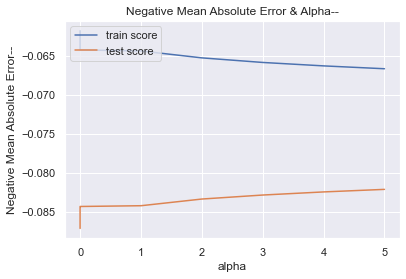

In [918]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error--')
plt.title("Negative Mean Absolute Error & Alpha--")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [919]:
# the absolute error is kind of stabilising at 2
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-5.62812505e-03,  1.18626466e-02,  1.88170129e-02,  6.62505664e-02,
        4.76599439e-02,  2.92261388e-03,  2.28354752e-02, -5.80736609e-03,
        5.02432847e-02,  3.57898200e-02,  4.31494812e-02,  0.00000000e+00,
        6.52682087e-02,  9.73350448e-03, -2.68792119e-03,  1.89323232e-02,
        2.02364694e-02,  6.71435963e-03,  0.00000000e+00, -5.87438348e-04,
        2.10373670e-02,  1.17950697e-02,  1.13050608e-02, -1.96388318e-03,
        7.86727027e-05,  1.37284978e-02,  3.78943792e-04, -2.07721434e-03,
        1.42177004e-01,  1.51318675e-01,  1.40214653e-01,  1.33193291e-01,
        1.58178005e-02, -4.89052013e-03,  1.15579344e-02,  4.22814615e-04,
       -2.12777313e-02, -4.90494384e-03,  3.47439055e-02, -2.78935625e-02,
       -4.41875578e-02, -1.72697663e-02,  2.99964333e-02, -3.25751305e-02,
        2.59870921e-03, -4.32895136e-02,  1.92210124e-02,  2.56993082e-02,
       -1.45747035e-02,  1.25185668e-01, -6.67940090e-02, -5.02327082e-03,
       -7.45535988e-02, -

In [920]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.862),
 ('MSSubClass', -0.006),
 ('LotFrontage', 0.012),
 ('LotArea', 0.019),
 ('OverallQual', 0.066),
 ('OverallCond', 0.048),
 ('MasVnrArea', 0.003),
 ('BsmtFinSF1', 0.023),
 ('BsmtFinSF2', -0.006),
 ('TotalBsmtSF', 0.05),
 ('1stFlrSF', 0.036),
 ('2ndFlrSF', 0.043),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.065),
 ('BsmtFullBath', 0.01),
 ('BsmtHalfBath', -0.003),
 ('FullBath', 0.019),
 ('HalfBath', 0.02),
 ('BedroomAbvGr', 0.007),
 ('KitchenAbvGr', 0.0),
 ('Fireplaces', -0.001),
 ('GarageArea', 0.021),
 ('WoodDeckSF', 0.012),
 ('OpenPorchSF', 0.011),
 ('EnclosedPorch', -0.002),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.014),
 ('PoolArea', 0.0),
 ('PropertyAge', -0.002),
 ('MSZoning_FV', 0.142),
 ('MSZoning_RH', 0.151),
 ('MSZoning_RL', 0.14),
 ('MSZoning_RM', 0.133),
 ('LotShape_IR2', 0.016),
 ('LotShape_IR3', -0.005),
 ('LotShape_Reg', 0.012),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', -0.021),
 ('LandContour_Lvl', -0.005),
 ('LotConfig_CulDSac', 0.035),
 ('LotCon

In [921]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9409917291360037
0.9250440716654654


In [922]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [923]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,11.862
30,MSZoning_RH,0.151
29,MSZoning_FV,0.142
31,MSZoning_RL,0.140
32,MSZoning_RM,0.133
50,Neighborhood_Crawfor,0.125
66,Neighborhood_StoneBr,0.082
165,CentralAir_Y,0.080
205,SaleCondition_Normal,0.079
92,RoofStyle_Shed,0.068


# LASSO

In [924]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [925]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.08005228133557771


In [926]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.143054,0.014204,0.001883,0.000540,0.0001,{'alpha': 0.0001},-0.081594,-0.086359,-0.083641,-0.078469,-0.079007,-0.081814,0.002937,2,-0.063115,-0.063056,-0.064641,-0.064528,-0.065463,-0.064161,0.000936
1,0.036328,0.012147,0.002856,0.001120,0.001,{'alpha': 0.001},-0.076123,-0.082218,-0.085522,-0.078052,-0.078347,-0.080052,0.003375,1,-0.071736,-0.071542,-0.071768,-0.073246,-0.073481,-0.072354,0.000831
2,0.010309,0.004181,0.001177,0.000173,0.01,{'alpha': 0.01},-0.081356,-0.091827,-0.095429,-0.084420,-0.088837,-0.088374,0.005036,3,-0.088755,-0.086301,-0.084639,-0.085955,-0.086714,-0.086473,0.001336
3,0.003929,0.000104,0.001229,0.000354,0.05,{'alpha': 0.05},-0.111242,-0.114890,-0.125045,-0.110316,-0.116030,-0.115505,0.005230,4,-0.112637,-0.113410,-0.113518,-0.114603,-0.113725,-0.113579,0.000631
4,0.004797,0.001550,0.002530,0.001352,0.1,{'alpha': 0.1},-0.145386,-0.143347,-0.165759,-0.145257,-0.157845,-0.151519,0.008791,5,-0.148679,-0.149160,-0.150644,-0.151924,-0.152572,-0.150596,0.001510


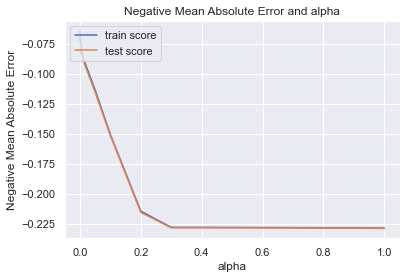

In [927]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [928]:
# Even the smallest of negative coefficients that have some predictive power towards
# 'SalePrice' have been generated at alpha = 0.01

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.00000000e+00,  1.64470661e-02,  1.85430365e-02,  1.02310121e-01,
        4.37730113e-02,  0.00000000e+00,  2.53451116e-02, -0.00000000e+00,
        4.81544125e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.37573621e-01,  5.81239769e-03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  9.42214992e-03,
        2.88733873e-02,  0.00000000e+00,  4.27687424e-03, -0.00000000e+00,
        8.04552738e-05,  5.27956125e-03,  2.42016861e-04, -3.88379983e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -

In [929]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.158),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.016),
 ('LotArea', 0.019),
 ('OverallQual', 0.102),
 ('OverallCond', 0.044),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.025),
 ('BsmtFinSF2', -0.0),
 ('TotalBsmtSF', 0.048),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.138),
 ('BsmtFullBath', 0.006),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', 0.0),
 ('Fireplaces', 0.009),
 ('GarageArea', 0.029),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.004),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.005),
 ('PoolArea', 0.0),
 ('PropertyAge', -0.004),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', -0

In [930]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8951372071706613
0.8929117060292842


In [931]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [932]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,12.158
1,MSSubClass,-0.000
2,LotFrontage,0.016
3,LotArea,0.019
4,OverallQual,0.102


In [933]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para.head(11)

,Variable,Coeff
0,constant,12.158
13,GrLivArea,0.138
4,OverallQual,0.102
9,TotalBsmtSF,0.048
5,OverallCond,0.044
21,GarageArea,0.029
7,BsmtFinSF1,0.025
3,LotArea,0.019
2,LotFrontage,0.016
20,Fireplaces,0.009


In [934]:
# sort the coefficients in descending order
para = para.sort_values((['Coeff']), axis = 0, ascending = True)
para.head(10)

,Variable,Coeff
28,PropertyAge,-0.004
58,Neighborhood_NWAmes,-0.000
59,Neighborhood_NoRidge,0.000
38,LandContour_Lvl,-0.000
37,LandContour_Low,0.000
36,LandContour_HLS,0.000
19,KitchenAbvGr,0.000
6,MasVnrArea,0.000
8,BsmtFinSF2,-0.000
10,1stFlrSF,0.000


# Observations


Surprise Housing should take into account the following parameters.

Features Positively affecting the price.

-	GrLivArea	0.138
-	OverallQual	0.102
-	TotalBsmtSF	0.048
-	OverallCond	0.044
-	GarageArea	0.029
-	BsmtFinSF1	0.025
-	LotArea	0.019
-	LotFrontage	0.016
-	Fireplaces	0.009
-	BsmtFullBath	0.006


The following feature affect the price negatively
-	PropertyAge	-0.004

These features have little to no impact
-	Neighborhood_NWAmes	-0.000
-	Neighborhood_NoRidge	0.000
-	LandContour_Lvl	-0.000
-	LandContour_Low	0.000
-	LandContour_HLS	0.000
-	KitchenAbvGr	0.000
-	MasVnrArea	0.000
-	BsmtFinSF2	-0.000
-	1stFlrSF	0.000